In [1409]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\renat\OneDrive\Área de Trabalho\projeto 2 cdados\22-2a-cd-p2-grupo_bexcamrefe


INTRODUÇÃO
Explicar objetivo do trabalho
Apresentar banco de dados
Definição de Target e Feature

Prever: A probabilidade de um voo americano em Janeiro vai ser cancelado.
Pergunta: Qual a probabilidade do meu voo ser cancelado de acordo com a sua cia aéra?

MINERAÇÃO DE DADOS
Limpeza do dataset

In [1410]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2019['Ano'] = 2019
Novos_dados_2019.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,9E,GNV,ATL,0.0,300.0,2019
1,9E,MSP,CVG,0.0,596.0,2019
2,9E,DTW,CVG,0.0,229.0,2019
3,9E,TLH,ATL,0.0,223.0,2019
4,9E,ATL,FSM,0.0,579.0,2019


In [1411]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2020['Ano'] = 2020
Novos_dados_2020.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,EV,ORD,GRB,0.0,174.0,2020
1,EV,TUL,ORD,0.0,585.0,2020
2,EV,EWR,TYS,0.0,631.0,2020
3,EV,BTR,IAH,0.0,253.0,2020
4,EV,RIC,IAH,0.0,1157.0,2020


In [1412]:
General_base  = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

General_base ['OP_CARRIER'] = General_base ['OP_CARRIER'].astype('category')
General_base ['ORIGIN'] = General_base ['ORIGIN'].astype('category')
General_base ['DEST'] = General_base ['DEST'].astype('category')
General_base ['CANCELLED'] = General_base ['CANCELLED'].astype('category')



In [1413]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [1414]:
General_base ['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']


In [1415]:
Dados_gerais_00 = General_base 
Dados_gerais = Dados_gerais_00.sample(frac = 0.01)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)


In [1416]:
Dados_gerais.dropna()

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
451874,SkyWest Airlines,SBP,SFO,0.0,190.0,2020
762062,SkyWest Airlines,MCI,SAN,0.0,1334.0,2019
462516,United Airlines Cargo,IAH,DEN,0.0,862.0,2020
533402,Alaska Airlines,BUR,SEA,0.0,937.0,2020
460960,United Airlines Cargo,FLL,ORD,0.0,1182.0,2020
...,...,...,...,...,...,...
428984,SkyWest Airlines,FWA,ATL,0.0,508.0,2020
361774,Southwest Airlines,SLC,PHX,0.0,507.0,2020
722082,Hawaiian Airlines,OGG,HNL,0.0,100.0,2019
370219,Southwest Airlines,TPA,LGA,0.0,1010.0,2020


In [1417]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]
#Voo_cancelados = Treinamento.loc[Cancelados,:]
#print(len(Voo_cancelados))
print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
261
OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
11652


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,11652.0,805.614,587.093,31.0,373.0,646.0,1050.0,4983.0
1.0,261.0,621.950,446.965,31.0,299.0,488.0,765.0,2556.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
True,261.0,621.95,446.965,31.0,299.0,488.0,765.0,2556.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
False,11652.0,805.614,587.093,31.0,373.0,646.0,1050.0,4983.0


Text(0, 0.5, 'Frequência absoluta')

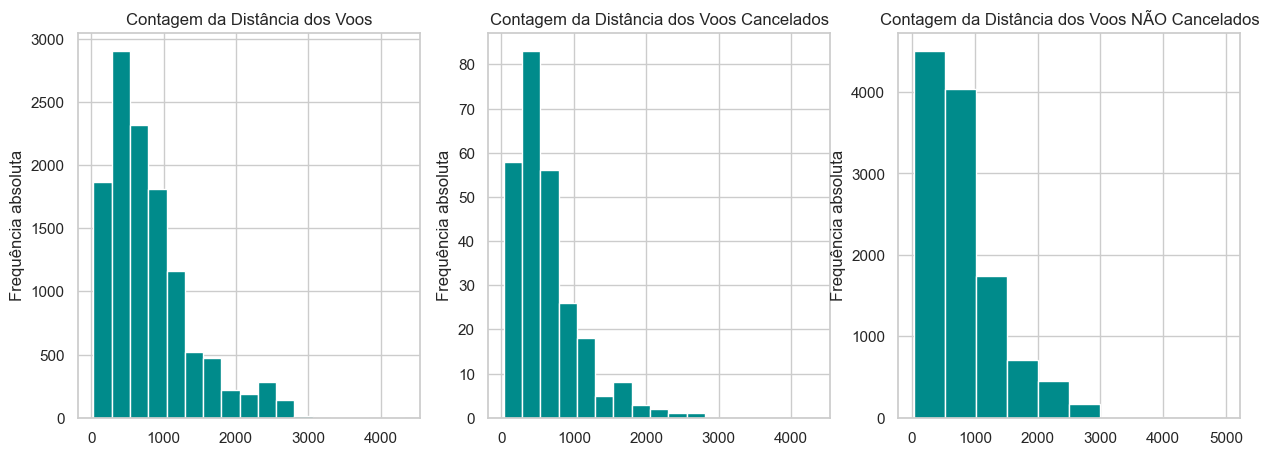

In [1418]:
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
display(Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3))
display(Cancelados.groupby(by= [Cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))
display(Nao_cancelados.groupby(by= [Nao_cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))

amplitude = Dados_gerais.DISTANCE.max()-Dados_gerais.DISTANCE.min()
amplitude_faixa= amplitude/ 10
faixa= np.arange(30, 5100.0, amplitude_faixa )

amplitude_cancelados = Cancelados.DISTANCE.max()-Cancelados.DISTANCE.min()
amplitude_faixa_cancelados = amplitude_cancelados / 10
faixa_canc = np.arange(30, 4480.0, amplitude_faixa_cancelados )

amplitude_nao_cancelados = Nao_cancelados.DISTANCE.max()-Nao_cancelados.DISTANCE.min()
amplitude_faixa_nao_cancelados = amplitude_nao_cancelados / 10
faixa_nao_canc = np.arange(30, 5100.0, amplitude_faixa_nao_cancelados )


plt.figure(figsize=(15, 5))
# GRÁFICO DA DISTÂNCIA POR VOO
plt.subplot(131)
plt.hist(Dados_gerais.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos')
plt.ylabel('Frequência absoluta')
# GRÁFICO CANCELADOS
plt.subplot(132)
plt.hist(Cancelados.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos Cancelados')
plt.ylabel('Frequência absoluta')
# GRÁFICO NÃO CANCELADOS
plt.subplot(133)
plt.hist(Nao_cancelados.DISTANCE, bins=faixa_nao_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos NÃO Cancelados')
plt.ylabel('Frequência absoluta')



CANCELLED,0.0,1.0
OP_CARRIER,,
Envoy Air,94.4,5.6
Atlatic Southeast Airlines,95.1,4.9
JetBlue,95.7,4.3
Comair Delta Connection,97.1,2.9
SkyWest Airlines,97.2,2.8
Endeavor,97.3,2.7
Midwest Airlines,97.3,2.7
Southwest Airlines,97.4,2.6
All,97.8,2.2


None


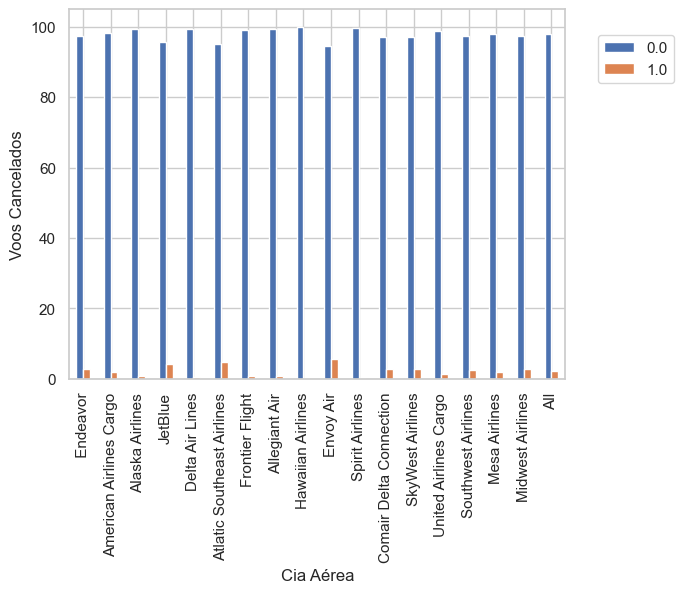

CANCELLED,0.0,1.0
DEST,,
LYH,0.0,100.0
ESC,0.0,100.0
PAH,0.0,100.0
EAU,50.0,50.0
MMH,50.0,50.0
PSG,50.0,50.0
PBG,50.0,50.0
LAW,66.7,33.3
MQT,66.7,33.3


None


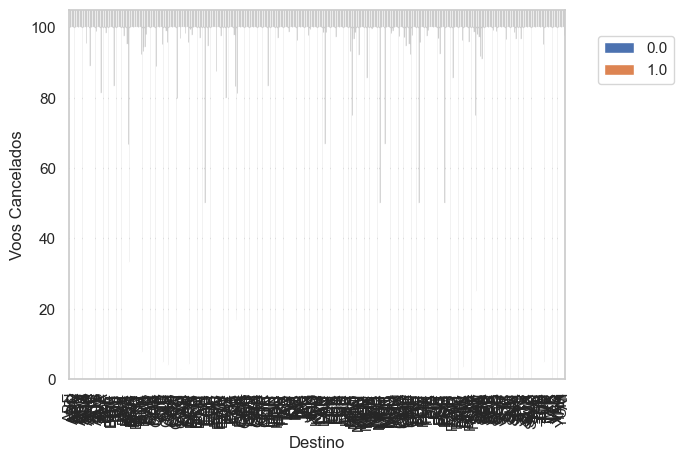

CANCELLED,0.0,1.0
ORIGIN,,
ART,0.0,100.0
WRG,50.0,50.0
BJI,50.0,50.0
MTJ,50.0,50.0
ALO,50.0,50.0
GRI,50.0,50.0
MLU,71.4,28.6
RST,77.8,22.2
MLI,78.6,21.4


None


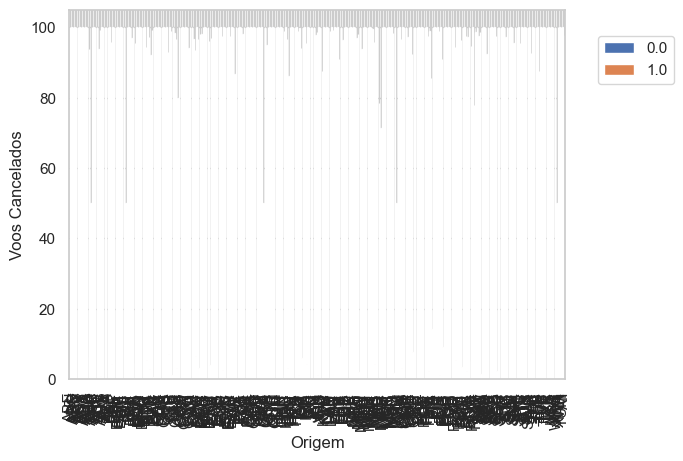

In [1419]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'], Dados_gerais['CANCELLED'],  normalize='index', margins=True).round(3)*100
cia_canc__ordenado = cia_canc.sort_values(0.0)
print(display(cia_canc__ordenado.head(15)))
cia_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
dest_canc_ordenado = dest_canc.sort_values(0.0)
print(display(dest_canc_ordenado.head(35)))
dest_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
org_canc_ordenado = org_canc.sort_values(0.0)
print(display(org_canc_ordenado.head(35)))
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()



In [1420]:
# TESTE QUI-QUADRADO DE PEARSON - teste de independência entre variáveis ​​categóricas
# adotando alfa de significancia = 5% (0.05)
from scipy.stats import chi2_contingency
alpha = 0.05

# Dependendia do status do voo X CIA AREA 
stat, pcia, dof, expected = chi2_contingency(cia_canc)
print("p cia value is " + str(pcia))
if pcia <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independente da CIA aérea')

# Dependendia do status do voo X DESTINO
stat, pdest, dof, expected = chi2_contingency(dest_canc)
print("p dest value is " + str(pdest))
if pdest <= alpha:
    print('Destino é Dependente')
else:
    print('Independente do DESTINO')

# Dependendia do status do voo X ORIGEM
stat, porg, dof, expected = chi2_contingency(org_canc)
print("p dest value is " + str(porg))
if porg <= alpha:
    print('Dependente da Origem')
else:
    print('Independente da Origem')

p cia value is 0.25087811875873584
Independente da CIA aérea
p dest value is 0.0
Destino é Dependente
p dest value is 0.0
Dependente da Origem


MONTANDO O MODELO PREDITIVO
- aqui sim temos que dividir em uma parte de treinamento

In [1421]:
Dados_gerais_00 = Dados_gerais 
Dados_gerais = Dados_gerais_00.sample(frac = 0.1)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)

In [1422]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dados_gerais = Dados_gerais.dropna()
Dados_gerais.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
3561,Atlatic Southeast Airlines,ERI,ORD,0.0,398.0,2020
752863,SkyWest Airlines,DTW,ORD,0.0,235.0,2019
38,Atlatic Southeast Airlines,EWR,TYS,0.0,631.0,2020
855258,Southwest Airlines,DAL,DEN,0.0,651.0,2019
643851,American Airlines Cargo,DFW,MIA,0.0,1121.0,2019


In [1423]:
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(Dados_gerais[var],prefix = var)
    Dados_gerais = Dados_gerais.join(cat_list)
     
data_vars=Dados_gerais.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [1424]:
data_final=Dados_gerais[to_keep]
data_final.columns.values

array(['CANCELLED', 'DISTANCE', 'Ano', 'OP_CARRIER_ Endeavor',
       'OP_CARRIER_American Airlines Cargo', 'OP_CARRIER_Alaska Airlines',
       'OP_CARRIER_JetBlue', 'OP_CARRIER_Delta Air Lines',
       'OP_CARRIER_Atlatic Southeast Airlines',
       'OP_CARRIER_Frontier Flight', 'OP_CARRIER_Allegiant Air',
       'OP_CARRIER_Hawaiian Airlines', 'OP_CARRIER_Envoy Air',
       'OP_CARRIER_Spirit Airlines', 'OP_CARRIER_Comair Delta Connection',
       'OP_CARRIER_SkyWest Airlines', 'OP_CARRIER_United Airlines Cargo',
       'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Mesa Airlines',
       'OP_CARRIER_Midwest Airlines', 'ORIGIN_ABE', 'ORIGIN_ABI',
       'ORIGIN_ABQ', 'ORIGIN_ABR', 'ORIGIN_ABY', 'ORIGIN_ACT',
       'ORIGIN_ACV', 'ORIGIN_ACY', 'ORIGIN_ADK', 'ORIGIN_ADQ',
       'ORIGIN_AEX', 'ORIGIN_AGS', 'ORIGIN_ALB', 'ORIGIN_ALO',
       'ORIGIN_AMA', 'ORIGIN_ANC', 'ORIGIN_APN', 'ORIGIN_ART',
       'ORIGIN_ASE', 'ORIGIN_ATL', 'ORIGIN_ATW', 'ORIGIN_ATY',
       'ORIGIN_AUS', 'ORIGIN_

In [1425]:
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
3561,0.0,398.0,2020,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
752863,0.0,235.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0.0,631.0,2020,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
855258,0.0,651.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643851,0.0,1121.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141316,0.0,801.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135290,0.0,861.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
602042,1.0,737.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954020,0.0,335.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1426]:
linhas = len(data_final)
col=len(data_final.columns)
b=0
while b < col:
    nome = data_final.columns[b]
    a = 0
    sum = 0
    while a<linhas:
        sum+=data_final.iloc[a,b]
        a+=1
    if sum == 0 and nome!= "CANCELLED":
        data_final = data_final.drop(nome, axis=1)
        col +=-1
    b+=1
data_sem_zero = data_final

In [1427]:
data_final=data_sem_zero
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_TUS,DEST_TWF,DEST_TYR,DEST_TYS,DEST_USA,DEST_VLD,DEST_VPS,DEST_XNA,DEST_YAK,DEST_YUM
3561,0.0,398.0,2020,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
752863,0.0,235.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0.0,631.0,2020,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
855258,0.0,651.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643851,0.0,1121.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141316,0.0,801.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135290,0.0,861.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
602042,1.0,737.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954020,0.0,335.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1428]:
X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:, data_final.columns == 'CANCELLED']

In [1429]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['CANCELLED'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['CANCELLED']==0]))
print("Number of subscription",len(os_data_y[os_data_y['CANCELLED']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==1])/len(os_data_X))

length of oversampled data is  1638
Number of no subscription in oversampled data 819
Number of subscription 819
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [1430]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

c:\Users\renat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\renat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True False False False
 False  True  True False False False False  True  True  True  True False
  True False False False False False  True  True  True  True  True False
 False False False  True  True  True  True False False False False  True
  True  True False  True  True  True False False False False False  True
 False  True  True  True  True  True False False  True  True False False
 False False  True False  True  True  True  True False  True False False
 False  True  True False  True False  True False False  True False False
  True  True False False  True False False  True  True  True False  True
  True  True False  True  True False False  True False  True  True  True
  True False False False  True False  True False False False False  True
  True False  True False False False  True False  True  True  True False
  True False False False  True  True False False Fa

In [1431]:
Name_list=[]
for i in range(len(rfe.support_)):
    teste = rfe.support_[i]
    nome = data_final.columns[i]
    if teste == True:
        Name_list.append(nome)
X=os_data_X[Name_list]
y=os_data_y['CANCELLED']

In [1432]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.117535
         Iterations: 35
         Function evaluations: 50
         Gradient evaluations: 50
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.830      
Dependent Variable:      CANCELLED            AIC:                  713.0463   
Date:                    2022-11-28 08:30     BIC:                  1598.8482  
No. Observations:        1638                 Log-Likelihood:       -192.52    
Df Model:                163                  LL-Null:              -1135.4    
Df Residuals:            1474                 LLR p-value:          1.5766e-290
Converged:               0.0000               Scale:                1.0000     
-------------------------------------------------------------------------------
                                       Coef.   Std.Err.  z  P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Ano                

c:\Users\renat\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\renat\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1433]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [1434]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
certos=confusion_matrix[0][0]+confusion_matrix[1][1]
errados=confusion_matrix[0][1]+confusion_matrix[1][0]
print(confusion_matrix)

print(f'Temos {certos} predições certas')
print(f'Temos {errados} predições erradas')

[[236  14]
 [ 10 232]]
Temos 468 predições certas
Temos 24 predições erradas


In [1435]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       250
         1.0       0.94      0.96      0.95       242

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.95       492
weighted avg       0.95      0.95      0.95       492



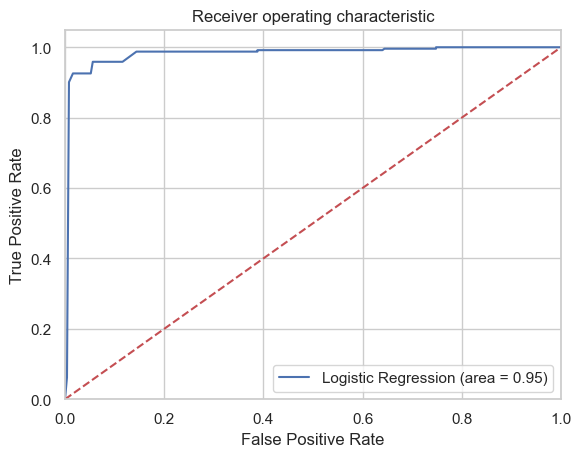

In [1436]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

MODELO DE PREDIÇÃO - RESULTADOS

VALIDAÇÃO DOS RESULTADOS

In [1437]:
# código de validação de resultados 